In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

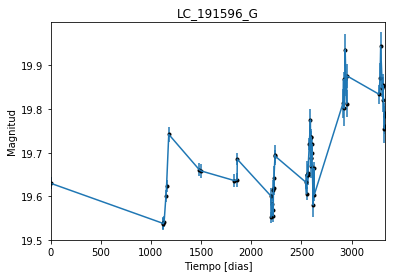

In [2]:
data = np.genfromtxt('LC_191596_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191596_G')
plt.savefig("LC_191596_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

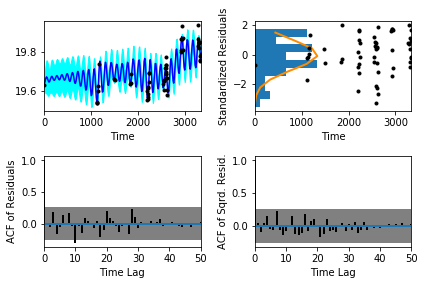

In [5]:
sample.assess_fit()

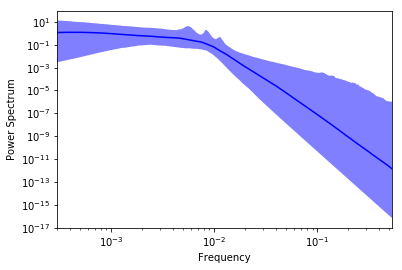

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

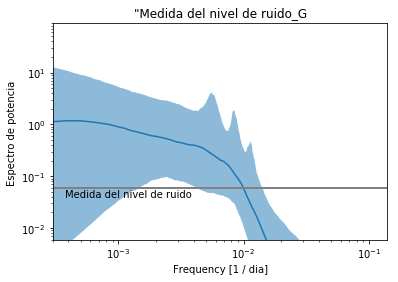

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191596_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191596_G')

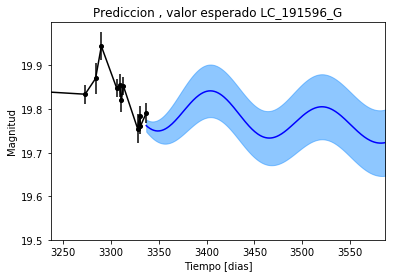

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191596_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191596_G')

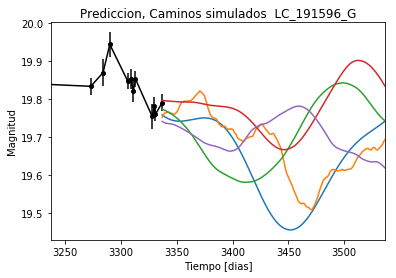

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191596_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


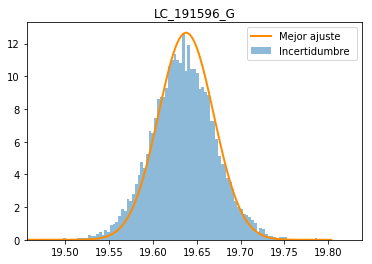

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191596_G')
plt.savefig("Mejor_ajuste_LC_191596_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191596_G')

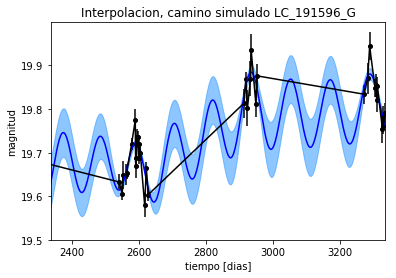

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_G')

Text(0.5,1,'Interpolacion, camino simulado LC_191596_G')

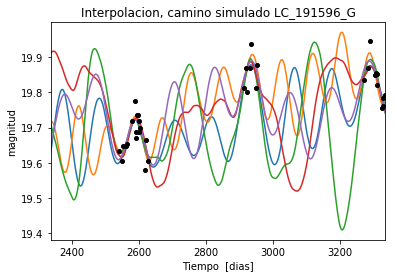

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 424.401225786
Median: 0.00194009295967
Standard deviation: 0.115989587386
68% credibility interval: [ 0.00049375  0.03735195]
95% credibility interval: [  3.29865084e-04   3.89827130e-01]
99% credibility interval: [  3.07325975e-04   8.21163804e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 197.0870549
Median: 0.00168962513907
Standard deviation: 0.0612329690359
68% credibility interval: [ 0.00048279  0.01099408]
95% credibility interval: [ 0.00032674  0.20844512]
99% credibility interval: [  3.05812404e-04   3.96764718e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 647.820662347
Median: 0.0151543012598
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 333.453453014
Median: 116.876447832
Standard deviation: 2.13323174311
68% credibility interval: [ 114.53260961  118.60992976]
95% credibility interval: [ 111.94248149  120.56566949]
99% credibility interval: [ 109.84357631  121.41262429]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 667.589211767
Median: 0.331009704156
Standard deviation: 1.7092636094
68% credibility interval: [ 0.04532116  2.73912531]
95% credibility interval: [ 0.01103723  5.96957523]
99% credibility interval: [ 0.00862799  7.62359559]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 366.680026538
Median: 0.0337337548785
Standard deviation: 7.40412879979
68% credibility interval: [ 0.00472057  2.82317207]
95% credibility interval: [  2.60475388e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 946.057956175
Median: 3.80280041189e-28
Standard deviation: 5.57055097195e+115
68% credibility interval: [  1.22601709e-115   2.66401556e+059]
95% credibility interval: [  1.12062628e-240   2.02957836e+093]
99% credibility interval: [  3.62755137e-282   2.23906383e+112]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1781.69491955
Median: 19.694671676
Standard deviation: 0.0379406445642
68% credibility interval: [ 19.66161917  19.72717435]
95% credibility interval: [ 19.61331829  19.76540396]
99% credibility interval: [ 19.56639079  19.79531917]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 272.298267152
Median: 0.00883482005827
Standard deviation: 0.218910149049
68% credibility interval: [ 0.00437764  0.17794148]
95% credibility interval: [ 0.          0.84296548]
99% credibility interval: [ 0.          0.99942152]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 272.298267152
Median: 0.00883482005827
Standard deviation: 0.218910149049
68% credibility interval: [ 0.00437764  0.17794148]
95% credibility interval: [ 0.          0.84296548]
99% credibility interval: [ 0.          0.99942152]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 419.421927817
Median: 0.0
Standard deviation: 0.0020239323454
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 333.453453014
Median: 116.876447832
Standard deviation: 2.13323174311
68% credibility interval: [ 114.53260961  118.60992976]
95% credibility interval: [ 111.94248149  120.56566949]
99% credibility interval: [ 109.84357631  121.41262429]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1679.47694553
Median: 0.0114194319399
Standard deviation: 0.00874610058807
68% credibility interval: [ 0.00766663  0.01893816]
95% credibility interval: [ 0.00562836  0.034839  ]
99% credibility interval: [ 0.00459914  0.05925737]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1046.61495857
Median: 1.36700281895
Standard deviation: 0.218895451296
68% credibility interval: [ 1.15880324  1.60504434]
95% credibility interval: [ 0.99661302  1.82908975]
99% credibility interval: [ 0.8787585   1.94505691]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1730.14595093
Median: 2.24848289877e-05
Standard deviation: 0.0793025090485
68% credibility interval: [  8.67908550e-64   2.57984296e-03]
95% credibility interval: [  6.24840652e-98   4.58496925e-02]
99% credibility interval: [  9.28850129e-116   3.14132712e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 424.401225786
Median: (-0.0121899635788-0.0433311105724j)
Standard deviation: 1.55659797829
68% credibility interval: [-0.23468922+0.j         -0.00310234-0.05861726j]
95% credibility interval: [ -2.44935610e+00+0.j         -2.07260345e-03-0.0509078j]
99% credibility interval: [ -5.15952435e+00+0.j          -1.93098605e-03-1.41148071j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 197.0870549
Median: (-0.0106162278485+0.043231854065j)
Standard deviation: 1.4282487327
68% credibility interval: [-0.06907784+0.05609729j -0.00303345+0.05353783j]
95% credibility interval: [-1.30969931+2.54327303j -0.00205294+0.03557019j]
99% credibility interval: [ -2.49294625e+00+5.96413406j  -1.92147600e-03+0.03655718j]
Posterior summar